In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/dacon_thnkgiving/train.csv')
test = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/dacon_thnkgiving/test.csv')
sample = pd.read_csv('/users/jjong/desktop/vscode/Dacon_src/dacon_thnkgiving/sample_submission.csv')

In [3]:
train

,ID,추석까지 남은 기간(주),쇼핑몰 구분,가격(원),프로모션 여부,도시 유형,지역 유형,쇼핑몰 유형,선물 유형,수요량
0,TRAIN_0000,1,쇼핑몰 15,212000,0,도시 6,지역 1,쇼핑몰 유형 2,명절혼합과일선물세트,28
1,TRAIN_0001,2,쇼핑몰 72,113000,0,도시 21,지역 1,쇼핑몰 유형 1,발효홍삼선물세트,27
2,TRAIN_0002,0,쇼핑몰 15,67000,0,도시 6,지역 1,쇼핑몰 유형 2,실속스팸선물세트,769
3,TRAIN_0003,1,쇼핑몰 13,206000,0,도시 12,지역 3,쇼핑몰 유형 1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,쇼핑몰 65,140000,0,도시 16,지역 2,쇼핑몰 유형 2,자연산새우선물세트,337
...,...,...,...,...,...,...,...,...,...,...
5867,TRAIN_5867,2,쇼핑몰 46,225000,0,도시 16,지역 3,쇼핑몰 유형 1,고급한과선물세트,27
5868,TRAIN_5868,2,쇼핑몰 42,62000,0,도시 16,지역 4,쇼핑몰 유형 3,특선스페셜스팸선물세트,40
5869,TRAIN_5869,2,쇼핑몰 43,131000,0,도시 5,지역 4,쇼핑몰 유형 1,명품맛김선물세트,55
5870,TRAIN_5870,2,쇼핑몰 7,85000,0,도시 7,지역 1,쇼핑몰 유형 1,실속형견과류선물세트,231


In [4]:
train['선물 유형'].unique()

array(['명절혼합과일선물세트', '발효홍삼선물세트', '실속스팸선물세트', '자연산프리미엄버섯선물세트', '자연산새우선물세트',
       '자연산생송이버섯선물세트', '리본포장홍삼선물세트', '최고급송이버섯선물세트', '프리미엄한과선물세트',
       '특선스팸선물세트', '건강담은견과류선물세트', '최적의선택스팸선물세트', '명품반건시곶감선물세트',
       '특별한선택스팸선물세트', '손질새우선물세트', '프리미엄한우선물세트', '실속형견과류선물세트',
       '특선스페셜스팸선물세트', '프리미엄고당도샤인머스캣선물세트', '고급한과선물세트', '감동스팸선물세트',
       '명품샤인머스캣선물세트', '행복스팸선물세트', '프리미엄왕곶감선물세트', '최고의선택스팸선물세트',
       '프리미엄종합스팸선물세트', '종합과일선물세트', '유기농올리브유선물세트', '알찬스팸선물세트',
       '유기농송이버섯선물세트', '재래김특선세트', '명품한우선물세트', '명품맛김선물세트', '보리굴비프리미엄선물세트',
       '프리미엄특선스팸선물세트', '프리미엄올리브유선물세트', '고당도샤인머스캣선물세트', '스팸안심특선',
       '한과종합선물세트', '상주반건시곶감선물세트', '알찬표고버섯3종세트', '블랙타이거새우선물세트',
       '유기농과일선물세트', '1++등급한우선물세트', '두번구운돌김선물세트', '스페셜올리브유선물세트',
       '영광굴비선물세트', '건강가득버섯선물세트', '명품굴비선물세트', '프리미엄견과선물세트', '건강가득홍삼선물세트'],
      dtype=object)

In [5]:
train.loc[train['수요량'].sort_values(ascending=False).index]


,ID,추석까지 남은 기간(주),쇼핑몰 구분,가격(원),프로모션 여부,도시 유형,지역 유형,쇼핑몰 유형,선물 유형,수요량
4447,TRAIN_4447,2,쇼핑몰 26,112000,1,도시 6,지역 1,쇼핑몰 유형 1,블랙타이거새우선물세트,4455
1648,TRAIN_1648,2,쇼핑몰 67,112000,1,도시 6,지역 1,쇼핑몰 유형 1,블랙타이거새우선물세트,3820
1625,TRAIN_1625,2,쇼핑몰 24,113000,1,도시 21,지역 1,쇼핑몰 유형 1,블랙타이거새우선물세트,3417
1399,TRAIN_1399,2,쇼핑몰 64,113000,1,도시 6,지역 1,쇼핑몰 유형 3,블랙타이거새우선물세트,3226
2866,TRAIN_2866,2,쇼핑몰 3,114000,1,도시 3,지역 1,쇼핑몰 유형 1,블랙타이거새우선물세트,3172
...,...,...,...,...,...,...,...,...,...,...
1659,TRAIN_1659,0,쇼핑몰 65,207000,0,도시 16,지역 2,쇼핑몰 유형 2,자연산프리미엄버섯선물세트,13
1643,TRAIN_1643,0,쇼핑몰 48,339000,0,도시 16,지역 3,쇼핑몰 유형 3,1++등급한우선물세트,13
1635,TRAIN_1635,0,쇼핑몰 55,277000,0,도시 5,지역 4,쇼핑몰 유형 2,영광굴비선물세트,13
5724,TRAIN_5724,0,쇼핑몰 45,212000,0,도시 14,지역 4,쇼핑몰 유형 1,종합과일선물세트,13


In [6]:
train.pivot_table(index='선물 유형', columns='지역 유형', values='수요량', aggfunc='sum')
tmp = train.groupby('선물 유형')['수요량'].sum().sort_values(ascending=False)
len(tmp)

51

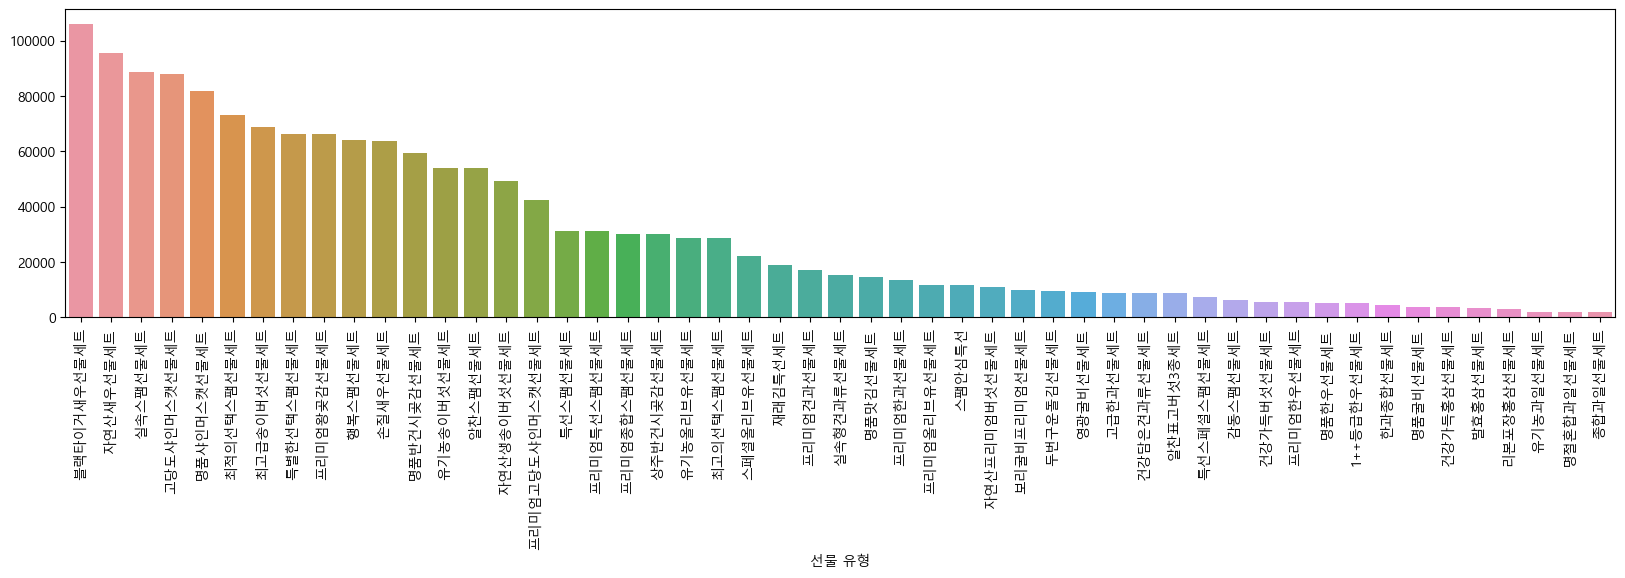

In [7]:
plt.figure(figsize=(20,4))
sns.barplot(x=tmp.index, y=tmp.values)
plt.xticks(rotation=90)
plt.show()

In [8]:
X = pd.get_dummies(train.drop('ID', axis=1))
y = X['수요량']
X = X.drop('수요량', axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_test_sc = std.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 2, 4]
              }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# 그리드 서치를 사용하여 모델 훈련
grid_search.fit(X, y)

# 최적의 하이퍼파라미터와 점수 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 점수 (음수 MSE):", -grid_search.best_score_)

# 최적의 모델을 얻어옵니다.
best_rf_regressor = grid_search.best_estimator_

# 모델을 사용하여 예측
y_pred = best_rf_regressor.predict(X)

# RMSE 계산
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("테스트 데이터에 대한 RMSE:", rmse)

최적 하이퍼파라미터: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
최적 점수 (음수 MSE): 55804.04676859261
테스트 데이터에 대한 RMSE: 215.14257322261352


In [18]:
from sklearn.metrics import mean_absolute_error
rf_re = RandomForestRegressor(n_estimators=300, max_depth=7, min_samples_leaf=2, min_samples_split=2)
rf_re.fit(X_train, y_train)

y_pred = rf_re.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

54849.855837374394
149.54287743038498
234.20046079667392


In [12]:
import xgboost as xgb

# XGBoost 회귀 모델 생성
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV를 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'max_depth': [3, 5, 7, 9],  # 트리의 최대 깊이
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'min_child_weight': [1, 2, 3],  # 리프 노드의 최소 가중치 합
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# 그리드 서치를 사용하여 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 점수 (음수 MSE):", -grid_search.best_score_)

# 최적의 모델을 얻어옵니다.
best_xgb_regressor = grid_search.best_estimator_

# 모델을 사용하여 예측
y_pred = best_xgb_regressor.predict(X_test)

# RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("테스트 데이터에 대한 RMSE:", rmse)

최적 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500}
최적 점수 (음수 MSE): 25267.630769497162
테스트 데이터에 대한 RMSE: 164.89835984101697


In [22]:
xgb_re = xgb.XGBRegressor(n_estimators=500, learning_rate=0.5, max_depth=5, gamma=0.3)
xgb_re.fit(X_train, y_train)

y_pred = xgb_re.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

26589.91051146242
94.99294835973294
163.06413005766296


In [25]:
X = test.drop('ID', axis=1)
id = test['ID']

In [32]:
X = pd.get_dummies(X)
X
y_pred = xgb_re.predict(X)

In [33]:
y_pred = pd.DataFrame(y_pred, columns=['수요량'])
y_pred

,수요량
0,233.010727
1,6.788359
2,349.119873
3,193.880005
4,213.863831
...,...
3910,853.400818
3911,318.533722
3912,176.781647
3913,1149.215576


In [34]:
submit = pd.concat([id, y_pred], axis=1)
submit

,ID,수요량
0,TEST_0000,233.010727
1,TEST_0001,6.788359
2,TEST_0002,349.119873
3,TEST_0003,193.880005
4,TEST_0004,213.863831
...,...,...
3910,TEST_3910,853.400818
3911,TEST_3911,318.533722
3912,TEST_3912,176.781647
3913,TEST_3913,1149.215576


In [35]:
# save csv file
submit.to_csv('submission.csv', index=False)